In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['font.size']=15
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('cars.csv', index_col=0)
df.index.name = 'trial_num'
df

,speed,dist
trial_num,,
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34


In [3]:
df.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


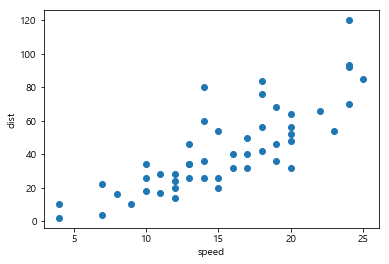

In [4]:
plt.scatter(df['speed'], df['dist'])
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

In [5]:
result = stats.linregress(df.speed, df.dist)
result

LinregressResult(slope=3.932408759124089, intercept=-17.579094890510973, rvalue=0.8068949006892107, pvalue=1.4898364962950552e-12, stderr=0.4155127766571222)

In [6]:
# 귀무 가설: 속도와 거리간의 연관성이 없다
# 대립 가설: 속도와 거리간의 연관성이 있다.
# p-value가 0.1이면 => 귀무가설 채택 확률 (10%), 대립가설 (90%)
# p-value가 0.05이면 => 귀무가설 채택 확률 (5%), 대립가설 (95%)
# p-value가 0.01이면 => 귀무가설 채택 확률 (1%), 대립가설 (99%)

print("기울기: ", result.slope)
print("절편: ", result.intercept)
print("상관계수: ", result.rvalue)
print("p-value: ", result.pvalue)
print("편차: ", result.stderr)

기울기:  3.932408759124089
절편:  -17.579094890510973
상관계수:  0.8068949006892107
p-value:  1.4898364962950552e-12
편차:  0.4155127766571222


In [7]:
df['lm'] = df['speed'] * result.slope + result.intercept
df

,speed,dist,lm
trial_num,,,
1,4,2,-1.849460
2,4,10,-1.849460
3,7,4,9.947766
4,7,22,9.947766
5,8,16,13.880175
6,9,10,17.812584
7,10,18,21.744993
8,10,26,21.744993
9,10,34,21.744993


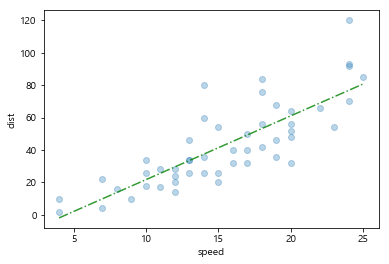

In [8]:
plt.scatter(df['speed'], df['dist'], alpha=0.3)
plt.plot(df['speed'], df['lm'], 'g-.', alpha=0.8)
plt.xlabel('speed')
plt.ylabel('dist')
plt.show()

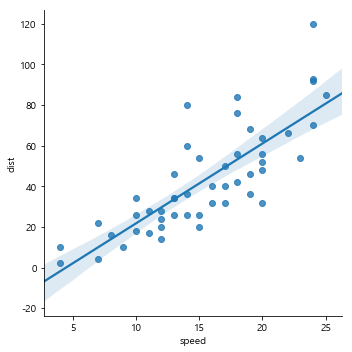

In [9]:
sns.lmplot(x = 'speed', y = 'dist', data=df)

In [12]:
model = sm.OLS.from_formula('dist~speed', df)
result = model.fit()       # training...
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           1.49e-12
Time:                        15:52:06   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
result.params

Intercept   -17.579095
speed         3.932409
dtype: float64